The goal of this project is to understand this traffic better, in particular the volume and distribution of events, and to develop ideas how to increase the links' clickrates. With that in mind, please analyze the data using the Python libraries Pandas and SciPy where indicated, providing answers to the presented questions:

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats

In [3]:
df = pd.read_csv('traffic.csv')

In [4]:
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [5]:
df.shape

(226278, 9)

In [6]:
df.dtypes

event      object
date       object
country    object
city       object
artist     object
album      object
track      object
isrc       object
linkid     object
dtype: object

In [7]:
df.describe()

,event,date,country,city,artist,album,track,isrc,linkid
count,226278,226278,226267,226267,226241,226273,226273,219157,226278
unique,3,7,211,11993,2419,3254,3562,709,3839
top,pageview,2021-08-19,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,142015,35361,47334,22791,40841,40841,40841,40841,40841


In [8]:
df.isna().sum()

event         0
date          0
country      11
city         11
artist       37
album         5
track         5
isrc       7121
linkid        0
dtype: int64

In [9]:
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


Q1
How many total pageview events did the links in the provided dataset receive in the full period, how many per day?

In [10]:
df["event"].value_counts()

pageview    142015
click        55732
preview      28531
Name: event, dtype: int64

In [11]:
df[df["event"] == "pageview"].shape[0]

142015

In [12]:
df[df["event"] == "pageview"].\
groupby(by="date")["event"].count()

date
2021-08-19    22366
2021-08-20    21382
2021-08-21    21349
2021-08-22    20430
2021-08-23    18646
2021-08-24    18693
2021-08-25    19149
Name: event, dtype: int64

In [13]:
df_unique = df.drop_duplicates()

In [23]:
df_unique["event"].value_counts()

pageview    73360
click       32499
preview     16708
Name: event, dtype: int64

In [14]:
df_unique[df_unique["event"] == "pageview"].shape[0]

73360

In [15]:
df_unique[df_unique["event"] == "pageview"].\
groupby('date', as_index=False).\
agg({'event':'count'})

,date,event
0,2021-08-19,13006
1,2021-08-20,11088
2,2021-08-21,9939
3,2021-08-22,9982
4,2021-08-23,9722
5,2021-08-24,9705
6,2021-08-25,9918


Q2
What about the other recorded events?

In [32]:
df['event'].unique()

array(['click', 'preview', 'pageview'], dtype=object)

In [16]:
df[df["event"] == "click"].\
groupby(by="date")["event"].count()

date
2021-08-19    9207
2021-08-20    8508
2021-08-21    8071
2021-08-22    7854
2021-08-23    7315
2021-08-24    7301
2021-08-25    7476
Name: event, dtype: int64

In [17]:
df[df["event"] == "preview"].\
groupby(by="date")["event"].count()

date
2021-08-19    3788
2021-08-20    4222
2021-08-21    4663
2021-08-22    4349
2021-08-23    3847
2021-08-24    3840
2021-08-25    3822
Name: event, dtype: int64

Q3
Which countries did the clicks come from?

In [36]:
df[df["event"] == "click"]['country'].dropna().nunique()

202

In [37]:
df[df["event"] == "click"]['country'].dropna().unique()

array(['Saudi Arabia', 'India', 'France', 'Maldives', 'United States',
       'Sierra Leone', 'United Kingdom', 'Sweden', 'United Arab Emirates',
       'Qatar', 'Germany', 'Albania', 'Iraq', 'Romania', 'Morocco',
       'Kuwait', 'Nigeria', 'Finland', 'Bangladesh', 'Fiji', 'Turkey',
       'Russia', 'Belgium', 'Norway', 'Cabo Verde', 'Italy', 'Austria',
       'Libya', 'Pakistan', 'Bahrain', 'Tunisia', 'DR Congo', 'Australia',
       'Canada', 'Kenya', 'French Guiana', 'Jordan', 'Netherlands',
       'Somalia', 'Mexico', 'Oman', 'Sri Lanka', 'Ecuador', 'Latvia',
       'Guatemala', 'South Africa', 'Bosnia and Herzegovina', 'Yemen',
       'Switzerland', 'Slovenia', 'Mauritania', 'Cameroon', 'Spain',
       'Thailand', 'Egypt', 'Poland', 'Ghana', 'Gabon', 'Greece',
       'Burkina Faso', 'Malaysia', 'Zambia', 'American Samoa', 'Algeria',
       'Uganda', 'Bulgaria', 'Denmark', 'Colombia', 'Portugal', 'Senegal',
       'Ireland', 'Panama', 'Serbia', 'Haiti', 'Honduras', 'Tanzania',
    

Q4
What was the overall click rate (clicks/pageviews)?

In [18]:
dff = df[df.event != 'preview'].groupby(['linkid','event'], as_index=False )\
.agg({'date':'count'})\
.pivot(index='linkid', columns='event', values='date')\
.reset_index()

In [19]:
dff = dff.dropna()

In [20]:
dff['rate']=dff['click']/dff['pageview']

In [21]:
dff

event,linkid,click,pageview,rate
1,00126b32-0c35-507b-981c-02c80d2aa8e7,2.0,2.0,1.000000
6,004b9724-abca-5481-b6e9-6148a7ca00a5,1.0,1.0,1.000000
9,0063a982-41cd-5629-96d0-e1c4dd72ea11,2.0,3.0,0.666667
10,006af6a0-1f0d-4b0c-93bf-756af9071c06,8.0,36.0,0.222222
11,00759b81-3f04-4a61-b934-f8fb3185f4a0,3.0,4.0,0.750000
...,...,...,...,...
3831,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29.0,84.0,0.345238
3834,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1.0,1.0,1.000000
3836,fff84c0e-90a1-59d8-9997-adc909d50e16,1.0,1.0,1.000000
3837,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1.0,2.0,0.500000


Q5
How does the clickrate distribute across different links?

In [22]:
dff["rate"].describe()

count    2253.000000
mean        0.809920
std         1.958030
min         0.090909
25%         0.500000
50%         1.000000
75%         1.000000
max        92.300000
Name: rate, dtype: float64

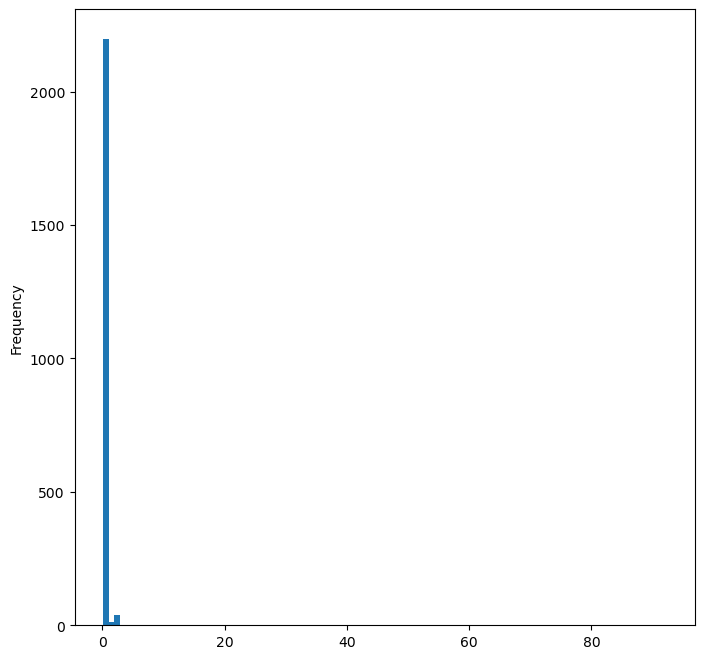

In [23]:
ax = dff["rate"].plot(kind="hist", figsize=(8, 8), bins=100)

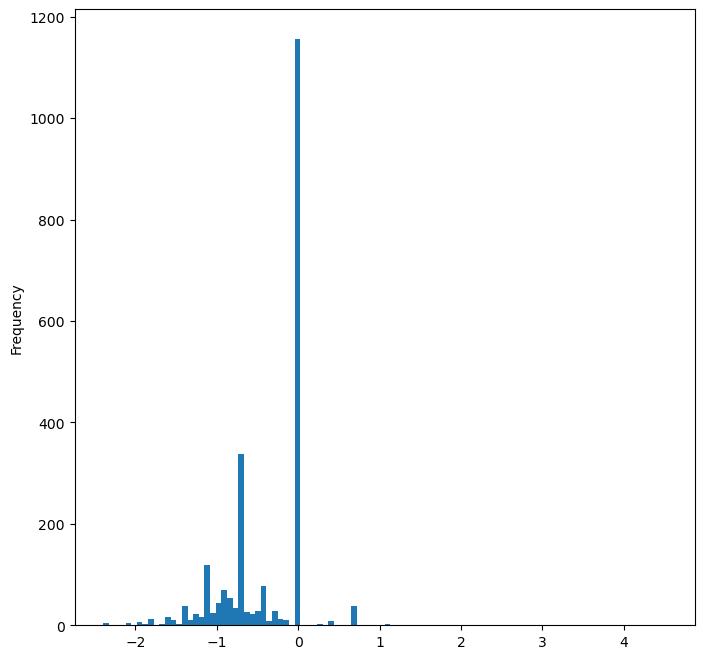

In [24]:
dff['rate_log'] = np.log(dff['rate'])
ax = dff['rate_log'].plot(kind='hist', figsize=(8, 8), bins=100)

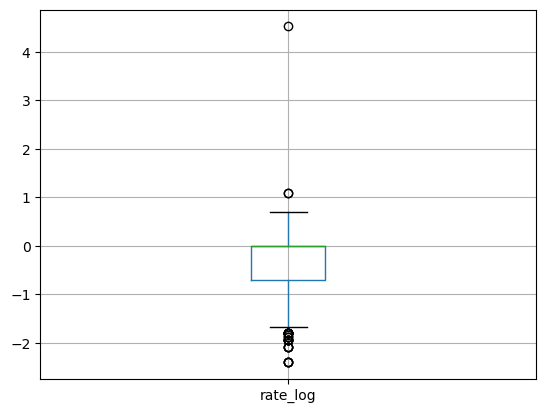

In [25]:
ax = dff.boxplot(column="rate_log")

In [26]:
dff["rate_log"].describe()

count    2253.000000
mean       -0.373334
std         0.517287
min        -2.397895
25%        -0.693147
50%         0.000000
75%         0.000000
max         4.525044
Name: rate_log, dtype: float64

Q5
Is there any correlation between clicks and previews on a link? Is it significant? How large is the effect?

In [27]:
df[df['event'].isin(['preview','cliks'])]\
.groupby(['linkid','event'])\
.agg({'date':'count'})

,,date
linkid,event,
006af6a0-1f0d-4b0c-93bf-756af9071c06,preview,11
00759b81-3f04-4a61-b934-f8fb3185f4a0,preview,1
00829040-ee01-4409-966d-d67c7965144a,preview,9
00de7566-f014-4d20-8616-82e4dea45b88,preview,1
0211bf4d-0e9d-46c2-889c-f97872280820,preview,141
...,...,...
fd647d87-4c7a-4dd1-92c6-0e7dd7fdf4f1,preview,101
fe24ad63-e347-40db-8e75-94e573bd3d9b,preview,1
fe8a3fcd-7beb-4db0-8494-5238e1e1cab3,preview,57


In [28]:
df1 = df[df.event != 'pageview'].groupby(['linkid','event'], as_index=False )\
.agg({'date':'count'})\
.pivot(index='linkid', columns='event', values='date')\
.reset_index()

In [144]:
df1.sort_values(by='click', ascending=False)

event,linkid,click,preview
439,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
2088,e849515b-929d-44c8-a505-e7622f1827e9,2198.0,1571.0
770,522da5cc-8177-4140-97a7-a84fdb4caf1c,2109.0,1605.0
970,681d888a-59ce-4acb-b7c5-95dab0c063d9,1500.0,658.0
1765,c2c876ab-b093-4750-9449-6b4913da6af3,1429.0,1001.0
...,...,...,...
1846,cc172576-975d-46b1-91d0-efbb617577e7,NaN,1.0
1921,d4a7b0a4-861c-4635-b361-300e5c0f5595,NaN,1.0
1977,da232b3a-405d-4e90-8f75-679f397f2b08,NaN,1.0
2083,e7da3823-551d-4d9f-9d88-8a1d012043ed,NaN,1.0


In [32]:
df1.dropna(subset=["click", "preview"], inplace=True) 

In [33]:
df1.sort_values(by='click', ascending=False)

event,linkid,click,preview
439,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
2088,e849515b-929d-44c8-a505-e7622f1827e9,2198.0,1571.0
770,522da5cc-8177-4140-97a7-a84fdb4caf1c,2109.0,1605.0
970,681d888a-59ce-4acb-b7c5-95dab0c063d9,1500.0,658.0
1765,c2c876ab-b093-4750-9449-6b4913da6af3,1429.0,1001.0
...,...,...,...
1231,85de285e-8c72-4fc1-a1c7-ce2f34121ca1,1.0,1.0
399,297fa1f6-7505-49b3-8210-a9ee2ba92091,1.0,2.0
2082,e7d83d9f-7119-48d4-b570-e6af90976e34,1.0,1.0
380,27c6ad2e-f5b0-4584-a803-33111b48d48d,1.0,1.0


In [34]:
scipy.stats.pearsonr(x=df1["click"], y=df1["preview"])

PearsonRResult(statistic=0.993422470424896, pvalue=0.0)